In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Clean data from YouTube comments csv and perform sentiment analysis with a word cloud. Also find
# the most commonly used emojis.

In [4]:

comments = pd.read_csv(r'sample_data/UScomments.csv', header=None, error_bad_lines=False)
comments

<ipython-input-4-c3d1e5208d31>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'sample_data/UScomments.csv', header=None, error_bad_lines=False)


,0,1,2,3
0,oKzFGhlFqqE,best commentary ever. Meyers for president!,0,0
1,oKzFGhlFqqE,Thank you for calling men like this predators....,0,0
2,oKzFGhlFqqE,Simultaneously galaxy lamp happen restore cruc...,0,0
3,oKzFGhlFqqE,Lets remember what Trump said about Roger Ail...,0,0
4,oKzFGhlFqqE,I cant believe I actually clicked on this clip...,0,0
...,...,...,...,...
75867,EoejGgUNmVU,Лучшая,1,0
75868,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
75869,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
75870,EoejGgUNmVU,Islığı yeter...,0,0


In [5]:
comments.isnull().sum()

0    0
1    2
2    0
3    0
dtype: int64

In [6]:
comments = comments.rename(columns={0: 'video_id', 1: 'comments_text', 2: 'likes', 3: 'replies'})


In [7]:
comments

,video_id,comments_text,likes,replies
0,oKzFGhlFqqE,best commentary ever. Meyers for president!,0,0
1,oKzFGhlFqqE,Thank you for calling men like this predators....,0,0
2,oKzFGhlFqqE,Simultaneously galaxy lamp happen restore cruc...,0,0
3,oKzFGhlFqqE,Lets remember what Trump said about Roger Ail...,0,0
4,oKzFGhlFqqE,I cant believe I actually clicked on this clip...,0,0
...,...,...,...,...
75867,EoejGgUNmVU,Лучшая,1,0
75868,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
75869,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
75870,EoejGgUNmVU,Islığı yeter...,0,0


In [8]:
comments.dropna(inplace=True)

In [9]:
!pip install Textblob


In [10]:
from textblob import TextBlob

In [11]:
comments.head(6)

,video_id,comments_text,likes,replies
0,oKzFGhlFqqE,best commentary ever. Meyers for president!,0,0
1,oKzFGhlFqqE,Thank you for calling men like this predators....,0,0
2,oKzFGhlFqqE,Simultaneously galaxy lamp happen restore cruc...,0,0
3,oKzFGhlFqqE,Lets remember what Trump said about Roger Ail...,0,0
4,oKzFGhlFqqE,I cant believe I actually clicked on this clip...,0,0
5,oKzFGhlFqqE,I watched trump blaspheming Jesus Christ and c...,0,0


In [12]:
TextBlob("Logan Paul it's yo big day !!!!").sentiment.polarity

0.0

In [13]:
polarity = []
for comment in comments['comments_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    polarity.append(0)

In [14]:
len(polarity)

75870

In [15]:
comments['polarity'] = polarity

In [16]:
comments.head(6)

,video_id,comments_text,likes,replies,polarity
0,oKzFGhlFqqE,best commentary ever. Meyers for president!,0,0,1.000000
1,oKzFGhlFqqE,Thank you for calling men like this predators....,0,0,0.500000
2,oKzFGhlFqqE,Simultaneously galaxy lamp happen restore cruc...,0,0,0.000000
3,oKzFGhlFqqE,Lets remember what Trump said about Roger Ail...,0,0,0.636667
4,oKzFGhlFqqE,I cant believe I actually clicked on this clip...,0,0,-0.112256
5,oKzFGhlFqqE,I watched trump blaspheming Jesus Christ and c...,0,0,-0.587500


In [17]:
filter1 = comments['polarity'] == 1

In [18]:
comments_positive = comments[filter1]

In [19]:
filter2 = comments['polarity'] == -1

In [20]:
comments_negative = comments[filter2]

In [21]:
comments_negative

,video_id,comments_text,likes,replies,polarity
967,pGVtDzMDJ0I,That's disgusting,1,0,-1.0
1054,M16CGK1T9MM,boring video,0,0,-1.0
1336,KZ6KpxURmks,they qualified and usa did not. USA must suck ...,0,0,-1.0
1529,AR764HY82Cs,what happened to her this song is so awful,0,0,-1.0
1671,FMQaJ6ylKs4,Shave that mustache Mitch!!! It's ugly as hell!!!,0,0,-1.0
...,...,...,...,...,...
75260,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
75337,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
75545,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
75652,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
total_comments_positive = ' '.join(comments_positive['comments_text'])

In [25]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

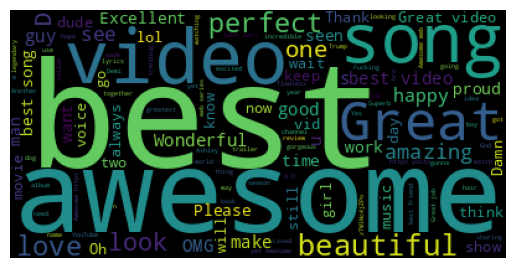

In [26]:
plt.imshow(wordcloud)
plt.axis('off')

In [27]:
total_comments_negative = ' '.join(comments_negative['comments_text'])

In [28]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

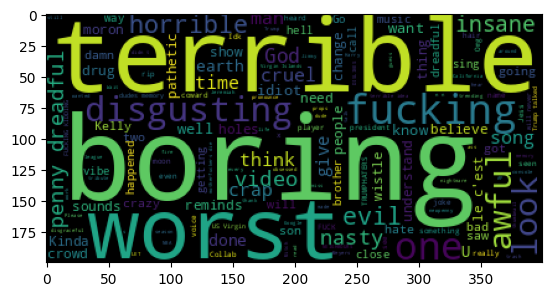

In [29]:
plt.imshow(wordcloud2)

In [30]:
comments_negative.head(5)

,video_id,comments_text,likes,replies,polarity
967,pGVtDzMDJ0I,That's disgusting,1,0,-1.0
1054,M16CGK1T9MM,boring video,0,0,-1.0
1336,KZ6KpxURmks,they qualified and usa did not. USA must suck ...,0,0,-1.0
1529,AR764HY82Cs,what happened to her this song is so awful,0,0,-1.0
1671,FMQaJ6ylKs4,Shave that mustache Mitch!!! It's ugly as hell!!!,0,0,-1.0


In [31]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 10.3 MB/s eta 0:00:00


In [32]:
import emoji

In [33]:
comments['comments_text']

0              best commentary ever. Meyers for president!
1        Thank you for calling men like this predators....
2        Simultaneously galaxy lamp happen restore cruc...
3        Lets remember what Trump said about  Roger Ail...
4        I cant believe I actually clicked on this clip...
                               ...                        
75867                                               Лучшая
75868    qu'est ce que j'aimerais que tu viennes à Roan...
75869                            Ven a mexico! 😍 te amo LP
75870                                      Islığı yeter...
75871    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comments_text, Length: 75870, dtype: object

In [34]:
emoji_list = []
for char in comment:
  if char in emoji.EMOJI_DATA:
    emoji_list.append(char)

In [35]:
all_emojis_list = []
for comment in comments['comments_text']:
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emojis_list.append(char)

In [36]:
all_emojis_list[0:10]

['😂', '❤', '😍', '😂', '❤', '😍', '😂', '❤', '😍', '😔']

In [37]:
from collections import Counter

In [38]:
most_common_emojis = Counter(all_emojis_list).most_common(10)
most_common_emojis

[('😂', 3922),
 ('❤', 3691),
 ('😍', 3085),
 ('😭', 1031),
 ('🔥', 884),
 ('♥', 851),
 ('👏', 851),
 ('💕', 723),
 ('😘', 667),
 ('💖', 560)]

In [39]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [40]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [41]:
freqs

[3922, 3691, 3085, 1031, 884, 851, 851, 723, 667, 560]

In [42]:
import plotly.graph_objs as go

In [43]:
from plotly.offline import iplot

In [44]:
trace = go.Bar(x=emojis, y=freqs)

In [45]:
iplot([trace])

In [46]:
# Export most common emojis to csv and then find which category has the most likes.

In [47]:
data = most_common_emojis
columns = ['emoji', 'number_of_emojis']
df = pd.DataFrame(data, columns=columns)
df.to_csv('output.csv', index=False)

In [54]:
import os

In [55]:
files = os.listdir(r'additional_data')

In [56]:
files

['KRvideos.csv',
 'GB_category_id.json',
 'JPvideos.csv',
 'CA_category_id.json',
 'IN_category_id.json',
 'MXvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'KR_category_id.json',
 'DE_category_id.json',
 'GBvideos.csv',
 'CAvideos.csv',
 'US_category_id.json',
 'DEvideos.csv',
 'RUvideos.csv',
 'JP_category_id.json',
 'FR_category_id.json',
 'RU_category_id.json',
 'FRvideos.csv',
 'MX_category_id.json']

In [58]:
files_csv = [file for file in files if '.csv' in file]
files_csv

['KRvideos.csv',
 'JPvideos.csv',
 'MXvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'GBvideos.csv',
 'CAvideos.csv',
 'DEvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv']

In [59]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [90]:
full_df = pd.DataFrame()
path = r'additional_data'


for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, error_bad_lines=False, encoding='iso-8859-1')

    full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [91]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [92]:
full_df = full_df.drop_duplicates()

In [93]:
### Saving a sample into another csv
full_df[0:1000].to_csv(r'sample_data/youtube_sample.csv' , index=False)

In [94]:
full_df[0:1000].to_json(r'sample_data/youtube_sample.json')

In [95]:
#create engine allows us to connect to database
from sqlalchemy import create_engine

In [96]:
engine = create_engine(r'sqlite:///sample_data/youtube_sample.sqlite')

In [97]:
### we will store first 1000 rows into Users table..
full_df[0:1000].to_sql('Users' , con=engine , if_exists='append')

1000

In [98]:
## lets read json file ..
json_df = pd.read_json(r'additional_data/US_category_id.json')

In [99]:
json_df['items'][0]


{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [100]:
cat_dict = {}

for item in json_df['items'].values:
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(item['id'])] = item['snippet']['title']
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [101]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [103]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...,People & Blogs
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...,News & Politics
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì,People & Blogs
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì ,News & Politics
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...,News & Politics


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'News & Politics'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Travel & Events'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Music'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Pets & Animals'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Shows'),
  Text(10, 0, 'Science & Technology'),
  Text(11, 0, 'Gaming'),
  Text(12, 0, 'Nonprofits & Activism'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Howto & Style'),
  Text(16, 0, 'Trailers'),
  Text(17, 0, 'Movies')])

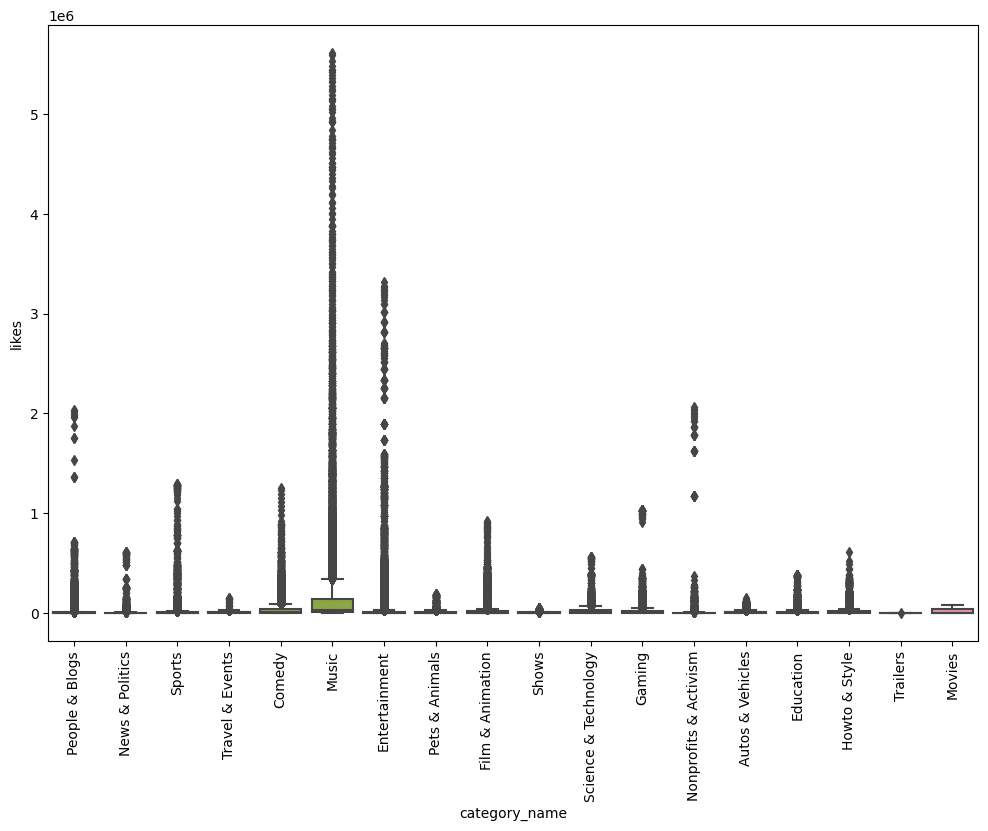

In [106]:
# Which category has the most likes?
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

In [110]:
# Which channels have the largest number of trending videos?

cdf = full_df['channel_title'].value_counts()

In [108]:
import plotly.express as px

In [112]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [113]:
cdf = cdf.rename(columns={0:'total_videos'})

In [114]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [115]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')